# Inner Rectangle
#### by Stephen Giang

#### Let there be a $n \times m$ rectangle, $R$, such that $R$ consists of $n$ rows and $m$ columns.  Calculate the maximum number of squares and rectangles that are within $R$.

Notice the following example. We have here a $2 \times 3$ rectangle.  It consists of $6 - (1 \times 1)$ squares and $2 - (2 \times 2)$ squares. Thus, we get the maximum number of squares that are inside the $2 \times 3$ rectangle is 8.

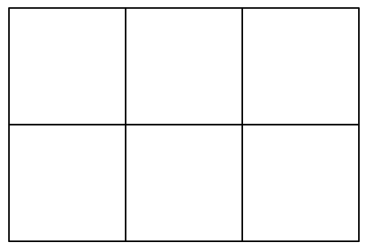

We can also see the number of rectangles that this square consists of $6 - (1 \times 1)$ rectangles, $4 - (1 \times 2)$ rectangles, $2 - (1 \times 3)$ rectangles, $3 - (2 \times 1)$ rectangles, $2 - (2 \times 2)$ rectangles, and $1 - (2 \times 3)$ rectangles.  Thus, we get the maximum number of rectangles that are inside the $2 \times 3$ rectangle is $18$

## Solution and Proof

Consider the $n \times m$ rectangle, $R$.  We can see that there are $m - (1 \times 1)$ rectangles per row.  We can see that there are $(m - 1) - (1 \times 2)$ rectangles.  We can see this through the fact that for the first $(1 \times 2)$ rectangle, the left square will be placed in the first column. The left square of the last rectangle will be placed in the second to last column.  If we had the left square of the last rectangle placed in the last column, the right square wouldn't be in $R$.  We can see that as the width of the circumscribed rectangles increases, the number of those rectangles that can be placed in each row decreases directly.  We can keep applying this logic for rectangles up to size $(1 \times m)$.
So thus we can see that for each row, there are $x$ amount of rectangles, where:
$$x = \sum_{k = 1}^{m} \,k = 1 + 2 + \cdots + (m - 1) + m$$

Now we can see that as we expand to $n \times m$ rectangles, there are now a total of $nx$ rectangles with height $1$.  Using the same logic as above, we can see that for the inner rectangles with height $h$, there are $(n - h + 1)x$ rectangles.  Thus we get the maximum number of rectangles that are within $R$ is $M_r$, where $M_r$ is:
$$ M_r = \sum_{h = 1}^{n} h \times \sum_{k = 1}^{m} k $$

To calculate the maximum number of squares, $M_s$, we notice the following.  We will always have $(n \times m) - (1 \times 1)$ squares.  As we increase the height of the squares, the number of squares per row decreases along with the number of squares per column.  This can be explained by the explanation of calculating the number of rectangles per row, found above.  An example of this would be that we get $(n - 1)(m - 1) - (2 \times 2)$ rectangles.  Assuming that $n \leq m$, we get the maximum number of squares that are within $R$ is $M_s$, where $M_s$ is:
$$M_s = \sum_{h = 1}^{n} h(h + m - n)$$

In [8]:
class Rectangle():
    
    def __init__(self, n, m):
        self.n = n
        self.m = m
        self.num_inner_squares = 0
        self.num_inner_rects = 0
        self.calc_inner_squares()
        self.calc_inner_rects()
        
    def calc_inner_shapes_brute(self):
        for i in range(1, self.n + 1):
            for j in range(1, self.m + 1):
                max_per_col = self.n - i + 1
                max_per_row = self.m - j + 1
                self.num_inner_rects = self.num_inner_rects + (max_per_col * max_per_row)
                if i == j:
                    self.num_inner_squares = self.num_inner_squares + (max_per_col * max_per_row)
                    
    def calc_inner_squares(self):
        iteration = self.n
        num_squares = self.m
        while (iteration > 0):
            self.num_inner_squares = self.num_inner_squares + (iteration * num_squares)
            iteration = iteration - 1
            num_squares = num_squares - 1
                    
    def calc_inner_rects(self):
        num_iterations = 0
        for i in range(1, self.n + 1):
            num_iterations = num_iterations + i
        for i in range(1, self.m + 1):
            self.num_inner_rects = self.num_inner_rects + i
        self.num_inner_rects = self.num_inner_rects * num_iterations
        
            
    def get_inner_squares(self):
        return self.num_inner_squares
    
    def get_inner_rects(self):
        return self.num_inner_rects
    
    def get_size(self):
        return [self.n, self.m]
    
    def __str__(self):
        size_arr = self.get_size()
        size = "Size: " + str(size_arr[0]) + " × " + str(size_arr[1])
        innerSquares = "Inner Squares: " + str(self.get_inner_squares())
        innerRects = "Inner Rectangles: " + str(self.get_inner_rects())
        return size + "\n" + innerSquares + "\n" + innerRects
    

In [9]:
r = Rectangle(2,3)
print(r)

Size: 2 × 3
Inner Squares: 8
Inner Rectangles: 18


# Inner Squares

#### Let there be a $n \times n$ square, $S$, such that $S$ consists of $n$ rows and $n$ columns.  Calculate the maximum number of squares and rectangles that are within $S$.

Notice the following example. We have here a $3 \times 3$ square.  It consists of $9 - (1 \times 1)$ squares, $4 - (2 \times 2)$ squares, and $1 - (3 \times 3)$ square. Thus, we get the maximum number of squares that are inside the $3 \times 3$ square is 14.

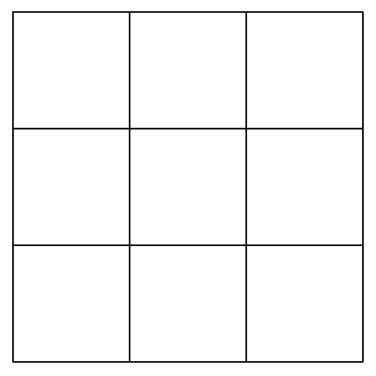

We can also see the number of rectangles that this square consists of: $9 - (1 \times 1)$ rectangles, $6 - (1 \times 2)$ rectangles, $3 - (1 \times 3)$ rectangles,  $6 - (2 \times 1)$ rectangles, $4 - (2 \times 2)$ rectangles, $2 - (2 \times 3)$ rectangles, $3 - (3 \times 1)$ rectangles, $2 - (3 \times 2)$ rectangles, $1 - (3 \times 3)$ rectangles.  Thus we get the maximum number of rectangles that are inside the $3 \times 3$ square is 36.

## Solution and Proof

Expanding on the solutions from the inner rectangles, we can see that a square is simply a rectangle with $n = m$.  Thus we get the following solutions:
$$M_r = \left(\sum_{h = 1}^{n} h\right)^2 \hspace{5em} M_s = \sum_{h = 1}^{n} h^2$$

In [10]:
class Square(Rectangle):
    
    def __init__(self, n):
        super().__init__(n, n)
        
    def calc_inner_squares(self):
        for i in range(1, self.n + 1):
            self.num_inner_squares = self.num_inner_squares + (i**2)
    
    def calc_inner_rects(self):
        for i in range(1, self.n + 1):
            self.num_inner_rects = self.num_inner_rects + i
        self.num_inner_rects = self.num_inner_rects**2
            

In [11]:
s = Square(3)
print(s)

Size: 3 × 3
Inner Squares: 14
Inner Rectangles: 36
